In [44]:
import pandas as pd
import numpy as np
import arrow
import matplotlib.pyplot as plt

# read data from the csv file
data = pandas.read_csv('bg.csv')

In [45]:
data

,member_id,diabetes_type,gender,date_utc,bg_checks,avg_bg_value,count_hyper_reading,count_hypo_reading
0,10213339002895,Type 2,Female,2017-08-01,4,157.00000,2,1
1,10213339002895,Type 2,Female,2017-08-02,4,152.61111,1,1
2,10213339002895,Type 2,Female,2017-08-03,1,157.88235,1,0
3,10213339002895,Type 2,Female,2017-08-04,2,162.47058,2,0
4,10213339002895,Type 2,Female,2017-08-05,4,166.22223,2,1
...,...,...,...,...,...,...,...,...
72972,1029648302090,Type 1,Male,2018-07-27,5,139.81250,0,2
72973,1029648302090,Type 1,Male,2018-07-28,4,115.70000,1,2
72974,1029648302090,Type 1,Male,2018-07-29,6,128.48387,2,0
72975,1029648302090,Type 1,Male,2018-07-30,5,147.18750,5,0


In [62]:
# Filling all Nan Values
data["avg_bg_value"].fillna( method ='ffill', inplace = True)

In [68]:
# Check for any Nan in DF
data.isnull().sum().sum()

0

In [63]:
# returns 0, no NaN values remain
# turn data into a Dataframe
bg_data = pd.DataFrame(data)

In [65]:
# now that data is manipulable, pivot and trim data to a 200x365 array
BG_data=bg_data.pivot(index= 'member_id', columns= 'date_utc', values='avg_bg_value')

In [38]:
BG_data.fillna(method='ffill', inplace= 'true')

NameError: name 'true' is not defined

In [69]:
# for Easier graph, manipulate original Data uzing Groupby
# store all the unique member id in 'member'
members = data.groupby(['date_utc','member_id']).first()
# grouped by date and member ID 

In [70]:
members

diabetes_type  gender  bg_checks  avg_bg_value  \
date_utc   member_id                                                       
2017-08-01 1022970537115         Type 2    Male          2     173.69565   
           1023580908884         Type 2  Female          1     124.00000   
           1023757968164         Type 1    Male          1     157.61539   
           1023785155422         Type 1  Female          2     143.88889   
           1023790793933         Type 2    Male          2     165.20000   
...                                 ...     ...        ...           ...   
2018-07-31 10217799862216        Type 1    Male          5     158.66667   
           10217808077477        Type 2  Female          3     137.07143   
           10217870037076        Type 1  Female          3     166.50000   
           10217927464151        Type 2    Male          7     169.83333   
           10218058060657        Type 1    Male          7     135.91837   

                           count_hyper_reading  count_hypo_reading  
date_utc   member_id                                                
2017-08-01 1022970537115                     1                   0  
           1023580908884                     0                   0  
           1023757968164                     0                   0  
           1023785155422                     1                   0  
           1023790793933                     1                   0  
...                                        ...                 ...  
2018-07-31 10217799862216                    1                   1  
           10217808077477                    0                   0  
           10217870037076                    3                   0  
           10217927464151                    3                   1  
           10218058060657                    0                   2  

[72977 rows x 6 columns]

Text(0, 0.5, 'Avg BG Value')

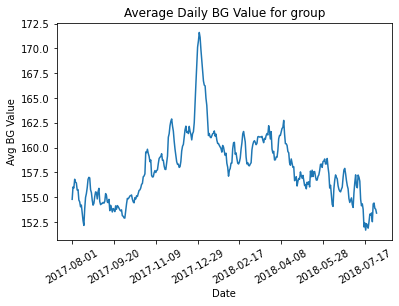

In [71]:
# Taking avg of bg values by date utilizing a muti index. 
mem_avg = members.groupby(['date_utc'])['avg_bg_value'].mean().plot()
#edit the plot for looks
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Average Daily BG Value for group")
plt.xlabel("Date")
plt.ylabel("Avg BG Value")
